In [19]:
### Installing the modules
import numpy as np
import keras
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization #(for regularization)
from PIL import Image
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [20]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False to directly get dense array

# Fit the encoder with the categories
encoder.fit([[0], [1]])  # Assuming binary classification: 0 for 'yes' (tumor), 1 for 'no' (no tumor)



## This cell updates the result list for images with tumor
data=[]
paths=[]
result=[]

# Storing the paths
for r,d,f in os.walk(r'/home/gopikag/Documents/ML_exercise/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))


for path in paths:
    img=Image.open(path)
    img=img.resize((128,128)) ## Resize so that all the images are of same size
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        # Remember that we have either 'yes' or 'no'. 
        # So label 0 is transformed into [1,0] (one-hot encoding)
        # label 1 is transformed into [0,1] (one-hot encoding)
        result.append(encoder.transform([[0]]))


In [21]:
### This cell updates the list for images without tumor
## This cell updates the result list for images with tumor
paths=[]


# Storing the paths
for r,d,f in os.walk(r'/home/gopikag/Documents/ML_exercise/brain_tumor_dataset/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))


for path in paths:
    img=Image.open(path)
    img=img.resize((128,128)) ## Resize so that all the images are of same size
    img=np.array(img)
    if (img.shape==(128,128,3)):
        data.append(np.array(img))
        # Remember that we have either 'yes' or 'no'. 
        # So label 0 is transformed into [1,0] (one-hot encoding)
        # label 1 is transformed into [0,1] (one-hot encoding)
        result.append(encoder.transform([[1]]))

In [22]:
data=np.array(data)
data.shape

(139, 128, 128, 3)

In [23]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 139


In [24]:
result=np.array(result)
result=result.reshape(139,2)

In [25]:
### Splitting the data into training and testing
x_train, x_test, y_train,y_test=train_test_split(data, result, test_size=0.2,shuffle=True,random_state=0)

In [26]:
print(f'Total number of images we have: {len(x_train)}')

Total number of images we have: 111


In [27]:
print(f'Total number of images we have: {len(x_test)}')

Total number of images we have: 28


In [29]:
### Building the AI model

## Figure-> Convolutional->Relu->Max pool

# By looking the CNN figure, we saw that first we will have convolutional layer
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same')) # No. of filters=32, size of filter=(2,2)
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',padding='Same'))

# Batch normalization: applied after the convolutional layers to acc training by scaling outputs to standard range. 
model.add(BatchNormalization()) # So that outputs are standarised to a common scale
model.add(MaxPooling2D(pool_size=(2,2))) # pull out the max values
model.add(Dropout(0.25)) # u randomly select 25% of filters and switch them off (reason: to avoid overfitting)

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten()) # See in the CNN figure (remember: flatten layer comes towards the end before fully connected layer )

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='Adamax')
print(model.summary())



/home/gopikag/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [30]:
### Model evaluation (Back propagation and Gradient Decsent)


### Remember: if Val_loss>training_loss , it is usually sign of overfitting
# If it happens, u can change CNN arch, reduce the size of epochs, introduce L1, L2 regularization
history=model.fit(x_train,y_train,epochs=30,batch_size=40,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - loss: 18.2423 - val_loss: 38.8111
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step - loss: 18.2101 - val_loss: 59.6672
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - loss: 11.4637 - val_loss: 6.0264
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - loss: 3.8979 - val_loss: 25.5734
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - loss: 3.0680 - val_loss: 21.5371
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - loss: 1.3118 - val_loss: 5.6877
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - loss: 0.3931 - val_loss: 2.5592
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - loss: 0.7975 - val_loss: 2.6090
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - loss: 0.4014 - val_loss: 2.7282
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - loss: 0.0831 - val_loss: 3.4532
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - loss: 0.3007 - val_loss: 4.7386
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - loss: 2.1401e-

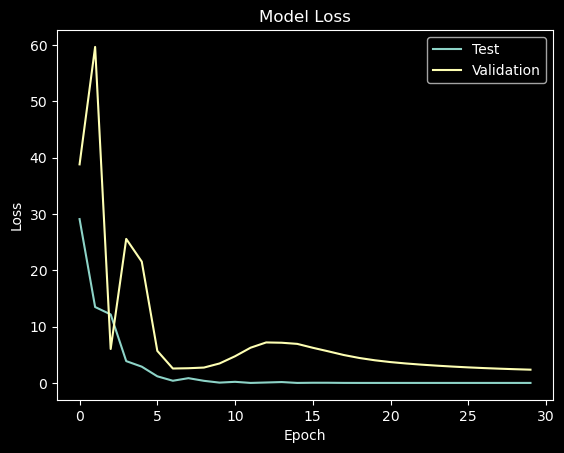

In [31]:
### Plotting the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [ ]:
## Testing the model
def names(number):
    if number==0:
        return 'It is a tumor'
    else:
        return 'It is not a tumor'
    


from matplotlib.pyplot import imshow
img=Image.open('')  ### We don't have the data currently
x=np.array(img.resize((128,128,3)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+'% Confidence This Is'+names(classification))

In [ ]:
### Building your own app so that others can use
## Use Gradio and the same code and above
# Now to use interface, write the below code:



def recognize_image(image):
    img=Image.fromarray(image).resize((128,128))
    x=np.array(img)
    
    x=x.reshape(1,128,128,3)
    res=model.predict_on_batch(x)
    classification=np.where(res==np.amax(res))[1][0]
    class_names=['No Tumor','Tumor']
    result=f'{names(classification)}'

    return result



## Upodate the import for components
image=gr.Image()
label=gr.Label()


### Create the interface with the updated component imports
iface=gr.Interface(fn=recognize_image,inputs=image,outputs=label,examples=examples, 
                   title=heading_title,decritpion=desc, article=long_desc, theme=selected_theme)


iface.launch(share=True,debug=True)